In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from vtspy import *

## Step 1. Load Fermi-LAT and VERITAS datasets

In [20]:
joint = JointAnalysis(fermi="analyzed", veritas="analyzed")

2022-06-16 14:13:12 INFO    : Initialize the joint-fit analysis...
2022-06-16 14:13:12 INFO    : Initialize the VERITAS analysis.
2022-06-16 14:13:12 INFO    : The setup is found [state_file = analyzed]. Read the state.
2022-06-16 14:13:12 INFO    : Completed (VERITAS initialization).
2022-06-16 14:13:12 INFO    : Initializing the Fermi-LAT analysis...
2022-06-16 14:13:16 INFO    : The setup and configuration is found [state_file = analyzed]. Loading the configuration...
2022-06-16 14:13:26 INFO    : Loading the Fermi-LAT events...
2022-06-16 14:13:26 INFO    : Loading the Fermi-LAT IRFs...
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2022-06-16 14:13:26 WARNING : FITSFixedWarning: RADECSYS= 'FK5 ' 
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58849.000000 from DATE-OBS.
Set MJD-END to 58850.000000 from DATE-END'. [astropy.wcs.wcs]
2022-06-16 14:13:26 WARNING : FITSFixedWarning: 'datfix' made the change 'Set DATEREF to '2001-01-01T00:01:04.184

### Check datasets and models

In [21]:
joint.print_datasets()

2022-06-16 14:13:28 INFO    : Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : fermi
  Instrument : 
  Models     : ['1ES1218+304', '4FGL J1217.9+3007', '4FGL J1225.9+2951', '4FGL J1221.5+2814', '4FGL J1231.7+2847', '4FGL J1159.5+2914', '4FGL J1230.2+2517', 'isodiff', 'galdiff']

Dataset 1: 

  Type       : SpectrumDatasetOnOff
  Name       : veritas
  Instrument : 
  Models     : ['1ES1218+304']




In [22]:
joint.print_models()

model,type,name,value,unit,error,min,max,frozen,is_norm,link
str11,str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
1ES1218+304,spectral,index,3.1270e+00,,1.223e-01,nan,nan,False,False,
1ES1218+304,spectral,amplitude,4.4324e-12,cm-2 s-1 TeV-1,6.802e-13,nan,nan,False,True,
1ES1218+304,spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,
1ES1218+304,spatial,lon_0,1.8534e+02,deg,0.000e+00,nan,nan,True,False,
1ES1218+304,spatial,lat_0,3.0168e+01,deg,0.000e+00,-9.000e+01,9.000e+01,True,False,


### Check a global SED before the fit

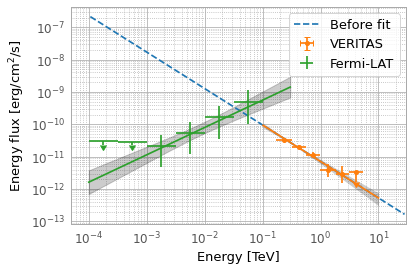

In [23]:
joint.sed_plot()

### Change a spectral model

/Users/dtak/Software/miniconda3/envs/fermipy/lib/python3.9/site-packages/gammapy/datasets/flux_points.py:288: RuntimeWarning: overflow encountered in square
  return ((data - model) / sigma.quantity[:, 0, 0]).to_value("") ** 2
2022-06-16 11:41:16 INFO    : The spectral model for the target is chaged:
2022-06-16 11:41:16 INFO    : PowerLawSpectralModel->LogParabolaSpectralModel


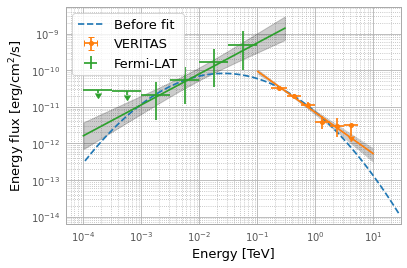

In [7]:
joint.change_model("logparabola", optimize=True, method="flux")
joint.sed_plot()

## Step 2. Run a joint-fit analysis

In [24]:
from astropy.table import Table
sed_tab = Table.read('./fermi/sed.fits', hdu=1)

### Check a global SED after the fit

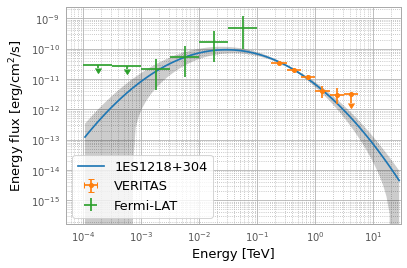

In [25]:
joint.sed_plot(show_flux_points=True)

## Bonus. Test the 'agnpy' model

In [8]:
from vtspy.model import default_model

In [9]:
agnpy = default_model("agnpy", redshift=0.182)

### Check initial parameters

In [10]:
agnpy.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str15,float64,str4,int64,float64,float64,bool,bool,str1
spectral,norm_e,1.0000e-07,cm-3,0.000e+00,1.000e-20,1.000e+00,False,True,
spectral,p1,1.0000e+00,,0.000e+00,-2.000e+00,5.000e+00,False,False,
spectral,p2,3.0000e+00,,0.000e+00,-2.000e+00,5.000e+00,False,False,
spectral,log10_gamma_b,5.0000e+00,,0.000e+00,1.000e+00,7.000e+00,False,False,
spectral,log10_gamma_min,2.6990e+00,,0.000e+00,0.000e+00,4.000e+00,True,False,
spectral,log10_gamma_max,6.0000e+00,,0.000e+00,4.000e+00,8.000e+00,True,False,
spectral,z,1.8200e-01,,0.000e+00,1.000e-02,1.000e+00,True,False,
spectral,d_L,2.8128e+27,cm,0.000e+00,1.000e+25,1.000e+33,True,False,
spectral,delta_D,1.0000e+01,,0.000e+00,0.000e+00,6.000e+01,False,False,


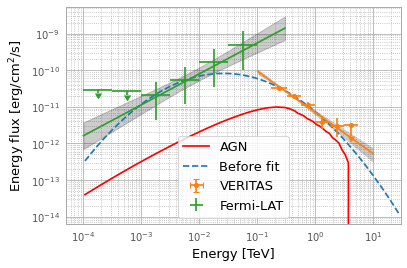

In [11]:
agnpy.plot([100 * u.MeV, 30 * u.TeV], sed_type="e2dnde", label="AGN", color="r")
joint.sed_plot(show_flux_points=True)

### Change a spectral model

2022-06-16 11:41:53 INFO    : A model, agnpy(SYN+SSC), is imported
2022-06-16 11:42:47 INFO    : The spectral model for the target is chaged:
2022-06-16 11:42:47 INFO    : LogParabolaSpectralModel->agnpy(SYN+SSC)


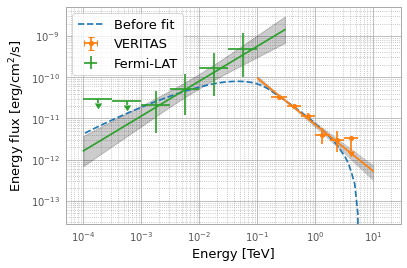

In [12]:
joint.change_model(agnpy, optimize=True, method="flux")
joint.sed_plot(show_flux_points=True)

In [14]:
joint.print_models()

model,type,name,value,unit,error,min,max,frozen,is_norm,link
str11,str8,str15,float64,str14,float64,float64,float64,bool,bool,str1
1ES1218+304,spectral,norm_e,6.5920e-07,cm-3,2.724e-07,1.000e-20,1.000e+00,False,True,
1ES1218+304,spectral,p1,1.4748e+00,,3.957e-01,-2.000e+00,5.000e+00,False,False,
1ES1218+304,spectral,p2,3.4644e+00,,1.513e-01,-2.000e+00,5.000e+00,False,False,
1ES1218+304,spectral,log10_gamma_b,4.5064e+00,,5.238e-02,1.000e+00,7.000e+00,False,False,
1ES1218+304,spectral,log10_gamma_min,2.6990e+00,,0.000e+00,0.000e+00,4.000e+00,True,False,
1ES1218+304,spectral,log10_gamma_max,6.0000e+00,,0.000e+00,4.000e+00,8.000e+00,True,False,
1ES1218+304,spectral,z,1.8200e-01,,0.000e+00,1.000e-02,1.000e+00,True,False,
1ES1218+304,spectral,d_L,2.8128e+27,cm,0.000e+00,1.000e+25,1.000e+33,True,False,
1ES1218+304,spectral,delta_D,1.3282e+01,,4.816e-01,0.000e+00,6.000e+01,False,False,


### Fit the data

In [15]:
joint.fit()

2022-06-16 11:45:16 INFO    : Start fitting...
2022-06-16 12:41:51 INFO    : Fit successfully.


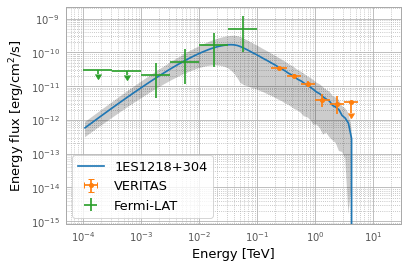

In [16]:
joint.sed_plot(show_flux_points=True)

In [17]:
joint.print_models()

model,type,name,value,unit,error,min,max,frozen,is_norm,link
str11,str8,str15,float64,str14,float64,float64,float64,bool,bool,str1
1ES1218+304,spectral,norm_e,5.4089e-06,cm-3,9.576e-07,1.000e-20,1.000e+00,False,True,
1ES1218+304,spectral,p1,-1.9520e+00,,2.003e-01,-2.000e+00,5.000e+00,False,False,
1ES1218+304,spectral,p2,3.2039e+00,,1.186e-01,-2.000e+00,5.000e+00,False,False,
1ES1218+304,spectral,log10_gamma_b,4.0838e+00,,5.997e-02,1.000e+00,7.000e+00,False,False,
1ES1218+304,spectral,log10_gamma_min,2.6990e+00,,0.000e+00,0.000e+00,4.000e+00,True,False,
1ES1218+304,spectral,log10_gamma_max,6.0000e+00,,0.000e+00,4.000e+00,8.000e+00,True,False,
1ES1218+304,spectral,delta_D,1.0989e+01,,1.134e-01,0.000e+00,6.000e+01,False,False,
1ES1218+304,spectral,log10_B,1.1028e+00,,1.474e-01,-4.000e+00,2.000e+00,False,False,
1ES1218+304,spectral,t_var,1.0000e+00,d,0.000e+00,1.000e+01,3.142e+07,True,False,
